## This is Task1 Code
**XJTLU**

**Name:** Fanyun Xu

**ID:** 2033366

In [2]:
from IPython.display import HTML
import numpy as np
import urllib.request
import bs4 #this is beautiful soup
import time
import operator
import socket
#import cPickle
import re # regular expressions
from bs4 import BeautifulSoup
import requests
from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

def getAndParseURL(url): #定义函数可以获取指定url的信息
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)


def getQuote(url):
    soup = getAndParseURL(url)
    Quote_list = soup.findAll("div", class_="quote")
    return Quote_list


def getUrl(url):
    quote = getQuote(url)
    URL = []
    for x in quote:
        author_href = x.find('a', text = "(about)").get("href")
        URL.append("http://quotes.toscrape.com" + author_href)
    return URL

content = []
author = []
tags = []
birthday = []
country = []
description = []


count = 1
while count < 11:
    url = "https://quotes.toscrape.com/page/" + str(count) + "/"
    quote = getQuote(url)
    URLs = []
    URLs = getUrl(url)

    for x in quote: #遍历整个quote，x代表一个div元素，搜索一个div元素中的span元素
        span = x.find('span', class_="text")
        content.append(span.text)

    for x in quote:
        small = x.find('small', class_="author")
        author.append(small.text)

    for x in quote:
        a = x.findAll('a', class_= "tag")
        Tag = []
        for t in a:
            Tag.append(t.text)
        tags.append(Tag)

    for url_ in URLs:
        soup = getAndParseURL(url_)
        date = soup.find('span',class_ = "author-born-date").text
        location = soup.find('span', class_ = "author-born-location").text
        birthday.append(date)
        country.append(location[3:])
        div = soup.find('div', class_ = "author-description")
        description.append(div.text)

    count = count+1


scraped_data = pd.DataFrame({'Quotes Content': content, 'Tags': tags, 'Author': author, "Birthday of the author": birthday, "Country of the author": country, "Description of the author": description})

display(scraped_data.head(10))

C:\Users\23758\AppData\Local\Temp\ipykernel_28648\257945368.py:40: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  author_href = x.find('a', text = "(about)").get("href")


,Quotes Content,Tags,Author,Birthday of the author,Country of the author,Description of the author
0,“The world as we have created it is a process ...,"[change, deep-thoughts, thinking, world]",Albert Einstein,"March 14, 1879","Ulm, Germany","\n In 1879, Albert Einstein was born in..."
1,"“It is our choices, Harry, that show what we t...","[abilities, choices]",J.K. Rowling,"July 31, 1965","Yate, South Gloucestershire, England, The Unit...",\n See also: Robert GalbraithAlthough s...
2,“There are only two ways to live your life. On...,"[inspirational, life, live, miracle, miracles]",Albert Einstein,"March 14, 1879","Ulm, Germany","\n In 1879, Albert Einstein was born in..."
3,"“The person, be it gentleman or lady, who has ...","[aliteracy, books, classic, humor]",Jane Austen,"December 16, 1775","Steventon Rectory, Hampshire, The United Kingdom",\n Jane Austen was an English novelist ...
4,"“Imperfection is beauty, madness is genius and...","[be-yourself, inspirational]",Marilyn Monroe,"June 01, 1926",The United States,\n Marilyn Monroe (born Norma Jeane Mor...
5,“Try not to become a man of success. Rather be...,"[adulthood, success, value]",Albert Einstein,"March 14, 1879","Ulm, Germany","\n In 1879, Albert Einstein was born in..."
6,“It is better to be hated for what you are tha...,"[life, love]",André Gide,"November 22, 1869","Paris, France",\n André Paul Guillaume Gide was a Fren...
7,"“I have not failed. I've just found 10,000 way...","[edison, failure, inspirational, paraphrased]",Thomas A. Edison,"February 11, 1847","Milan, Ohio, The United States",\n Thomas Alva Edison was an American i...
8,“A woman is like a tea bag; you never know how...,[misattributed-eleanor-roosevelt],Eleanor Roosevelt,"October 11, 1884",The United States,\n Anna Eleanor Roosevelt was an Americ...
9,"“A day without sunshine is like, you know, nig...","[humor, obvious, simile]",Steve Martin,"August 14, 1945","Waco, Texas, The United States","\n Stephen Glenn ""Steve"" Martin is an A..."


## This is Task 2 Code



Quotes possess significant potential to inspire thought and action. Classic aphorisms or statements from notable figures carry the power to motivate individuals, helping them overcome challenges and pursue their goals. Additionally, they contribute to a deeper understanding of the world, oneself, and others. In the context of Task 2, I aim to explore the factors that influence my liking for quotes. As such, I have rated 100 quotes for their likability, using a scale that ranges from 0.5 (most liked) to 4 (least liked). It's important to note that the ratings involve a substantial degree of subjectivity. Then, an analysis of the length of the introductions was conducted, and the range of values was divided.

In [3]:
rank = [1.5, 2, 3.5, 2.5, 3, 1.5, 2, 1, 1.5, 0.5, 4, 3, 1.5, 4, 2.5, 2.5, 1.5, 2, 2, 1, 4, 1.5, 0.5, 3, 3.5, 2.5, 3.5, 1.5, 1.5, 1.5, 3, 3.5, 2.5, 2, 1.5, 1.5, 0.5, 0.5, 1.5, 0.5, 2.5, 2, 1.5, 1, 1.5, 3, 2.5, 0.5, 1, 1.5, 3.5, 0.5, 3.5, 3.5, 3, 1.5, 0.5, 0.5, 3.5, 1.5, 4, 1, 2.5, 4, 0.5, 2.5, 2, 4, 1, 4, 2.5, 1.5, 3.5, 1.5, 4, 2, 3, 1, 1.5, 1, 1.5, 3, 4, 4, 1.5, 1.5, 3.5, 2.5, 2.5, 3.5, 3, 2.5, 0.5, 1, 1, 3.5, 3.5, 1.5, 0.5, 1.5]
rank_column = pd.DataFrame({'Rank':rank})
data = pd.concat([scraped_data,rank_column],axis = 1)

In [4]:
scraped_data['length'] = scraped_data['Quotes Content'].apply(len)
Q12 = np.percentile(scraped_data['length'],12)
Q25 = np.percentile(scraped_data['length'],25)
Q37 = np.percentile(scraped_data['length'],37)
Q50 = np.percentile(scraped_data['length'],50)
Q62 = np.percentile(scraped_data['length'],62)
Q75 = np.percentile(scraped_data['length'],75)
Q87 = np.percentile(scraped_data['length'],87)
Q100 = np.percentile(scraped_data['length'],100)
bins = [0,Q12,Q25,Q37,Q50,Q62,Q75,Q87,Q100]
labels = ['[0 ~54]','[54 ~ 66]','[66 ~ 75]','[75 ~ 86]','[86 ~ 105]','[105 ~ 125]','[125 ~ 155]','[155 ~ 1084]']
scraped_data['length_range'] = pd.cut(scraped_data['length'],bins = bins, labels = labels)
display(data.head(5))

,Quotes Content,Tags,Author,Birthday of the author,Country of the author,Description of the author,Rank
0,“The world as we have created it is a process ...,"[change, deep-thoughts, thinking, world]",Albert Einstein,"March 14, 1879","Ulm, Germany","\n In 1879, Albert Einstein was born in...",1.5
1,"“It is our choices, Harry, that show what we t...","[abilities, choices]",J.K. Rowling,"July 31, 1965","Yate, South Gloucestershire, England, The Unit...",\n See also: Robert GalbraithAlthough s...,2.0
2,“There are only two ways to live your life. On...,"[inspirational, life, live, miracle, miracles]",Albert Einstein,"March 14, 1879","Ulm, Germany","\n In 1879, Albert Einstein was born in...",3.5
3,"“The person, be it gentleman or lady, who has ...","[aliteracy, books, classic, humor]",Jane Austen,"December 16, 1775","Steventon Rectory, Hampshire, The United Kingdom",\n Jane Austen was an English novelist ...,2.5
4,"“Imperfection is beauty, madness is genius and...","[be-yourself, inspirational]",Marilyn Monroe,"June 01, 1926",The United States,\n Marilyn Monroe (born Norma Jeane Mor...,3.0


## Use a bar chart to display the relationship between the length of quotes and the level of liking. 
It can be observed that when the quote length is lower, the liking level is higher.

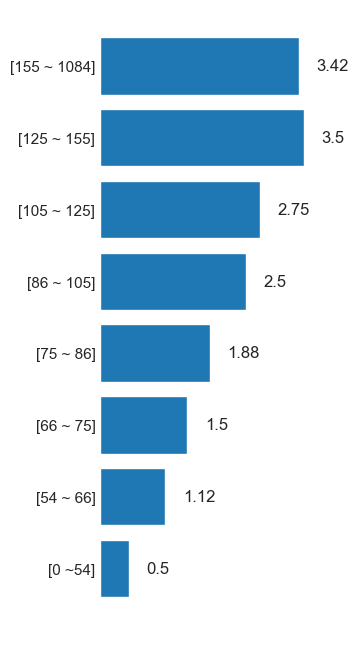

In [15]:
sns.set_context("notebook")
sns.color_palette()
data["length_range"] = scraped_data["length_range"]
group = data.groupby('length_range')['Rank'].mean().round(2)
plt.figure(figsize=(3, 8))
ax = plt.gca()
group2 = group
length_range = group2.index
rank = group2.values
nums = np.arange(len(group2))
plt.barh(nums, rank)
for p, c, ch in zip(nums, length_range, rank):
    plt.annotate(str(ch), xy=(ch + 0.3, p), va='center')
ticks = plt.yticks(nums, length_range) 
xt = plt.xticks()[0] 
plt.xticks(xt, [' '] * len(xt)) 
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)
plt.show()
plt.close()

## Use a histogram to display the frequency of liking levels
And also mark the average score within the graph to indicate the scoring situation. 
It can be very clearly observed that the frequency of a liking level of 1.5 is the highest, with 2.0 having the lowest frequency, and the mean value falls within the range of [2.0 ~ 2.5].

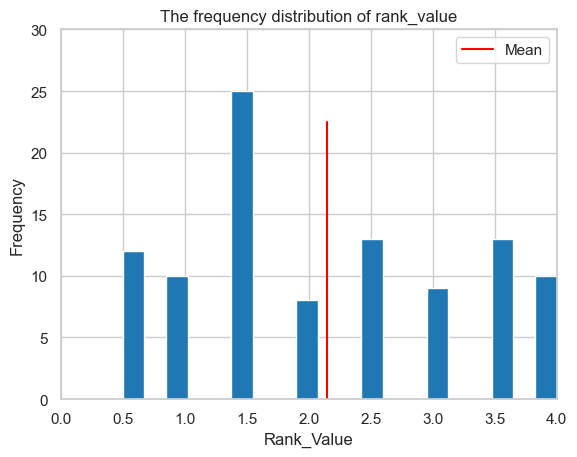

In [16]:
with sns.axes_style("whitegrid"):
    plt.hist(data.Rank.values, bins=20)
    plt.xlim([0,4])
    plt.ylim([0, 30])
    plt.axvline(data.Rank.mean(), 0, 0.75, color='r', label='Mean')
    plt.xlabel("Rank_Value")
    plt.ylabel("Frequency")
    plt.title("The frequency distribution of rank_value")
    plt.legend()
    plt.show()
    plt.close()

## Use a box plot to display the relationship between the number of labels and the level of liking.

From this, you can clearly observe the data distribution, including the median, quartiles, minimum, maximum, and the potential presence of outliers. It can be noticed that there are cases with zero labels, and when the number of labels is three, the overall level of liking is relatively high. Furthermore, regardless of the number of labels, there may still be situations with the lowest level of liking.

In [17]:
data['Tag_count'] = data['Tags'].apply(lambda x: len(x))
# row = data.loc[data['Tag_count']== 1]

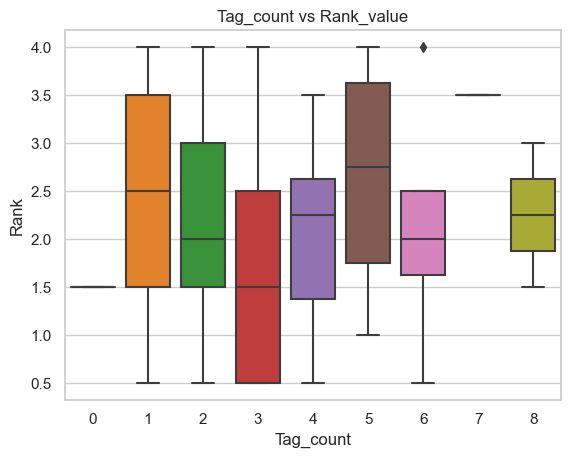

In [18]:
with sns.axes_style("whitegrid"):
    sns.boxplot(x = 'Tag_count', y = 'Rank', data = data)
    plt.xlabel('Tag_count')
    plt.ylabel('Rank')
    plt.title('Tag_count vs Rank_value')
    plt.show()
    plt.close()

## Use a scatter plot to visualize the relationship between two variables. 
From the graph, it can be observed that, relatively, there is an inverse relationship between likability and the length of the quotes, meaning that the longer the quotes, the lower the likability. It's worth noting that since most of the quotes have a length concentrated within 155 characters or less, the trend may not be very pronounced in the graph.

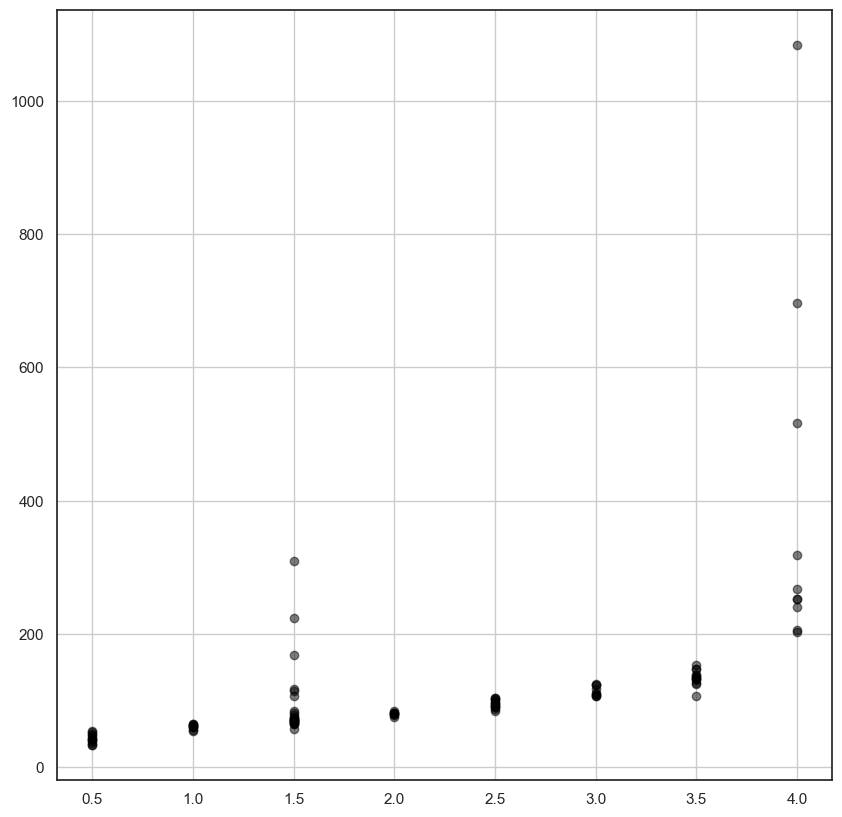

In [24]:
plt.figure(figsize=(10, 10)) 
plt.plot(data.Rank, scraped_data.length, marker='o', linestyle='None', color='k', alpha=0.5);
plt.grid(True)
plt.show()
plt.close()

## Use a pie chart to present the distribution of the nationalities of the authors of these quotes.

First, preprocess the data by extracting the nationality information of the authors and calculating their frequency of appearance. Then, store the results in a DataFrame format. From the chart, we can observe that the nationalities with the highest frequency of appearance are the United States, the United Kingdom, and Germany. This indicates that the distribution of author nationalities is more concentrated in these countries, which may suggest that these countries have a higher literary output, or that their works have a stronger influence within this collection of quotes.

In [25]:
def normalize_country(country):
    parts = country.split(',')
    return parts[-1].strip()
country_count = data['Country of the author'].apply(normalize_country).value_counts()
country_count

Country of the author
The United States                  46
The United Kingdom                 21
Germany                            13
Ireland                             6
Jamaica                             3
France                              2
the Former Yugoslav Republic of     2
Romania                             1
Chile                               1
Argentina                           1
Japan                               1
South Africa                        1
Russian Federation                  1
Afghanistan                         1
Name: count, dtype: int64

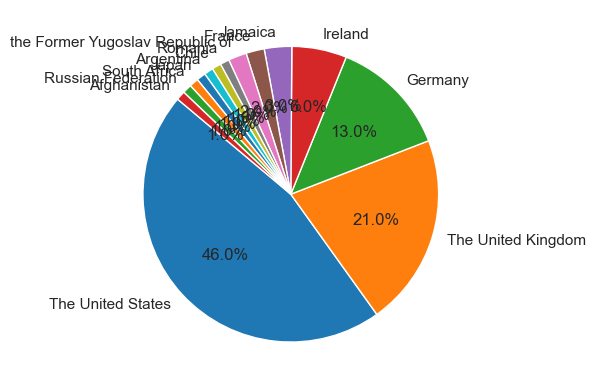

In [26]:
DATA = [['The United States',46],
['The United Kingdom',21],
['Germany',13],
['Ireland',6],
['Jamaica',3],
['France',2],
['the Former Yugoslav Republic of',2],
['Romania',1],
['Chile',1],
['Argentina',1],
['Japan',1],
['South Africa',1],
['Russian Federation',1],
['Afghanistan',1]]
columns = ['Country', 'Count']
country = pd.DataFrame(DATA, columns = columns)
country
Count = country['Count']
plt.pie(Count,labels = country['Country'],autopct = '%1.1f%%',startangle = 140)
plt.show()
plt.close()

## Create a heatmap to display the correlations between various variables. 
First, data preprocessing is required. From the original data, it can be observed that most of the variables are primarily in text format, making direct correlation analysis unfeasible. Therefore, it is necessary to convert these text data into numerical values. I encoded the values for each variable and then calculated their correlations using a correlation matrix. From the heatmap, it can be noticed that the correlation coefficient between "Rank" and "range_id" is 0.894471, close to 1, indicating a strong positive correlation between them. This implies that as "Rank" increases, "range_id" also increases.

In [27]:
authors = data['Author'].unique()
print (authors)

['Albert Einstein' 'J.K. Rowling' 'Jane Austen' 'Marilyn Monroe'
 'André Gide' 'Thomas A. Edison' 'Eleanor Roosevelt' 'Steve Martin'
 'Bob Marley' 'Dr. Seuss' 'Douglas Adams' 'Elie Wiesel'
 'Friedrich Nietzsche' 'Mark Twain' 'Allen Saunders' 'Pablo Neruda'
 'Ralph Waldo Emerson' 'Mother Teresa' 'Garrison Keillor' 'Jim Henson'
 'Charles M. Schulz' 'William Nicholson' 'Jorge Luis Borges'
 'George Eliot' 'George R.R. Martin' 'C.S. Lewis' 'Martin Luther King Jr.'
 'James Baldwin' 'Haruki Murakami' 'Alexandre Dumas fils'
 'Stephenie Meyer' 'Ernest Hemingway' 'Helen Keller' 'George Bernard Shaw'
 'Charles Bukowski' 'Suzanne Collins' 'J.R.R. Tolkien' 'Alfred Tennyson'
 'Terry Pratchett' 'J.D. Salinger' 'George Carlin' 'John Lennon'
 'W.C. Fields' 'Ayn Rand' 'Jimi Hendrix' 'J.M. Barrie' 'E.E. Cummings'
 'Khaled Hosseini' 'Harper Lee' "Madeleine L'Engle"]


In [28]:
data['Author_ID'] = pd.factorize(data['Author'])[0]+1

In [29]:
def normalize_country(country):
    parts = country.split(',')
    return parts[-1].strip()
data['Country_ID'] = pd.factorize(data['Country of the author'].apply(normalize_country))[0]+1

In [30]:
range_ = data['length_range'].unique()
print (range_)

['[105 ~ 125]', '[75 ~ 86]', '[125 ~ 155]', '[86 ~ 105]', '[66 ~ 75]', '[54 ~ 66]', '[0 ~54]', '[155 ~ 1084]']
Categories (8, object): ['[0 ~54]' < '[54 ~ 66]' < '[66 ~ 75]' < '[75 ~ 86]' < '[86 ~ 105]' < '[105 ~ 125]' < '[125 ~ 155]' < '[155 ~ 1084]']


In [31]:
data['range_id']=None
for index,row in data.iterrows():
    tem = row['length_range']
    if '[0 ~54]' in tem:
        data.at[index,'range_id'] = 1.0
    elif '[54 ~ 66]' in tem:
        data.at[index,'range_id'] = 2.0
    elif '[66 ~ 75]' in tem:
        data.at[index,'range_id'] = 3.0
    elif '[75 ~ 86]' in tem:
        data.at[index,'range_id'] = 4.0
    elif '[86 ~ 105]' in tem:
        data.at[index,'range_id'] = 5.0
    elif '[105 ~ 125]' in tem:
        data.at[index,'range_id'] = 6.0
    elif '[125 ~ 155]' in tem:
        data.at[index,'range_id'] = 7.0
    elif '[155 ~ 1084]' in tem:
        data.at[index,'range_id'] = 8.0
data['range_id'] = data['range_id'].astype(float)
display(data.head(5))

,Quotes Content,Tags,Author,Birthday of the author,Country of the author,Description of the author,Rank,length_range,Tag_count,Author_ID,Country_ID,range_id
0,“The world as we have created it is a process ...,"[change, deep-thoughts, thinking, world]",Albert Einstein,"March 14, 1879","Ulm, Germany","\n In 1879, Albert Einstein was born in...",1.5,[105 ~ 125],4,1,1,6.0
1,"“It is our choices, Harry, that show what we t...","[abilities, choices]",J.K. Rowling,"July 31, 1965","Yate, South Gloucestershire, England, The Unit...",\n See also: Robert GalbraithAlthough s...,2.0,[75 ~ 86],2,2,2,4.0
2,“There are only two ways to live your life. On...,"[inspirational, life, live, miracle, miracles]",Albert Einstein,"March 14, 1879","Ulm, Germany","\n In 1879, Albert Einstein was born in...",3.5,[125 ~ 155],5,1,1,7.0
3,"“The person, be it gentleman or lady, who has ...","[aliteracy, books, classic, humor]",Jane Austen,"December 16, 1775","Steventon Rectory, Hampshire, The United Kingdom",\n Jane Austen was an English novelist ...,2.5,[86 ~ 105],4,3,2,5.0
4,"“Imperfection is beauty, madness is genius and...","[be-yourself, inspirational]",Marilyn Monroe,"June 01, 1926",The United States,\n Marilyn Monroe (born Norma Jeane Mor...,3.0,[105 ~ 125],2,4,3,6.0


In [32]:
data[['Rank','Tag_count','range_id','Author_ID','Country_ID']].corr()

,Rank,Tag_count,range_id,Author_ID,Country_ID
Rank,1.000000,0.023538,0.894471,-0.074109,-0.043531
Tag_count,0.023538,1.000000,0.067265,0.120742,0.001088
range_id,0.894471,0.067265,1.000000,-0.146100,-0.080683
Author_ID,-0.074109,0.120742,-0.146100,1.000000,0.386516
Country_ID,-0.043531,0.001088,-0.080683,0.386516,1.000000


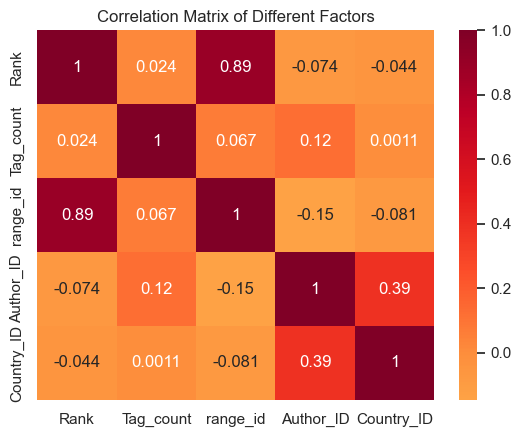

In [33]:
sns.heatmap(data[['Rank','Tag_count','range_id','Author_ID','Country_ID']].corr(), 
            xticklabels=data[['Rank','Tag_count','range_id','Author_ID','Country_ID']].corr().columns, 
            yticklabels=data[['Rank','Tag_count','range_id','Author_ID','Country_ID']].columns, 
            cmap='YlOrRd', center=0, annot=True)
plt.title('Correlation Matrix of Different Factors')
plt.show()
plt.close()